<a href="https://colab.research.google.com/github/rajbansi/text_classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from torch import nn, optim

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [8]:
Datadir = '/content/drive/MyDrive/train'
categories = ['christmas_cookies', 'christmas_presents', 'christmas_tree','fireworks', 'penguin','reindeer','santa','snowman']

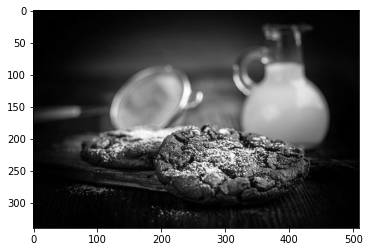

In [9]:
for category in categories:
  path = os.path.join(Datadir, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap= 'gray')
    plt.show()
    break
  break

In [10]:
print(img_array.shape)

(340, 509)


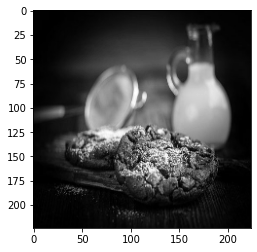

In [11]:
img_size = 224

new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
training_data = []

def create_training_data():
  for category in categories:
    path = os.path.join(Datadir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()


In [10]:
print(len(training_data))

3726


In [13]:
training_data[300]

[array([[243, 248, 249, ..., 254, 255, 254],
        [247, 249, 253, ..., 255, 255, 254],
        [249, 253, 254, ..., 254, 255, 254],
        ...,
        [244, 250, 253, ..., 254, 253, 253],
        [241, 247, 251, ..., 254, 255, 254],
        [237, 242, 247, ..., 254, 254, 254]], dtype=uint8), 0]

In [15]:
x = []
y = []
for features, label in training_data:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(-1,img_size,img_size,1)

In [2]:
import pickle
pickle_out = open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

NameError: ignored

In [4]:

x = pickle.load(open('/content/drive/MyDrive/x.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/y.pickle', 'rb'))

In [6]:
y[3000]

6

In [21]:
import os
import cv2
test_data = []
categories = []
Datadir = '/content/drive/MyDrive/val'
img_size = 224
def create_test_data():
  path = Datadir
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(img_size,img_size))
      test_data.append([new_array])
        
    except Exception as e:
      pass
      
    # class_num = categories.index(category)
    
 
    
  
create_test_data()
    

In [22]:
print(len(test_data))

160


In [24]:
test_data[1]

[array([[156, 144, 136, ..., 130, 129, 127],
        [144, 132, 129, ..., 129, 127, 129],
        [130, 123, 123, ..., 127, 128, 129],
        ...,
        [120,  98, 168, ...,  99,  89,  58],
        [112,  69, 141, ...,  67,  72,  50],
        [ 87,  64,  55, ..., 137, 103,  61]], dtype=uint8)]

In [27]:
import numpy as np
x_val = []

for features in test_data:
  x_val.append(features)
x_val = np.array(x_val).reshape(-1,img_size,img_size,1)

import pickle
pickle_out = open('x_val.pickle','wb')
pickle.dump(x_val,pickle_out)
pickle_out.close()

In [28]:
x_val = pickle.load(open('/content/drive/MyDrive/x_val.pickle', 'rb'))

In [30]:
x_val[1]

array([[[156],
        [144],
        [136],
        ...,
        [130],
        [129],
        [127]],

       [[144],
        [132],
        [129],
        ...,
        [129],
        [127],
        [129]],

       [[130],
        [123],
        [123],
        ...,
        [127],
        [128],
        [129]],

       ...,

       [[120],
        [ 98],
        [168],
        ...,
        [ 99],
        [ 89],
        [ 58]],

       [[112],
        [ 69],
        [141],
        ...,
        [ 67],
        [ 72],
        [ 50]],

       [[ 87],
        [ 64],
        [ 55],
        ...,
        [137],
        [103],
        [ 61]]], dtype=uint8)

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pickle
x_val = pickle.load(open('/content/drive/MyDrive/x_val.pickle', 'rb'))
x = pickle.load(open('/content/drive/MyDrive/x.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/y.pickle', 'rb'))

In [25]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [32]:
train_img = []
for img in x:
    
    # normalizing the pixel values
    img = np.divide(img,255.0)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)
train_x = np.array(train_img)
train_y = y
train_x.shape

(3726, 224, 224, 1)

In [34]:
train_x = np.squeeze(train_x, axis=(3,))

In [35]:
train_x.shape

(3726, 224, 224)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1f5be93b38>,
 <matplotlib.image.AxesImage at 0x7f1f5be81320>)

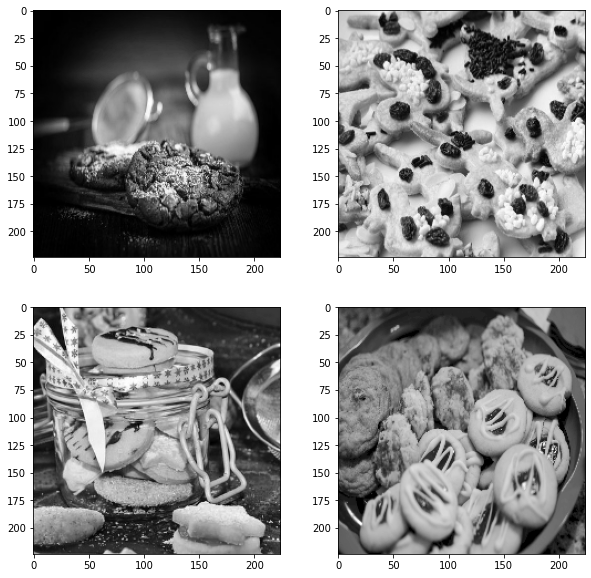

In [36]:
# visualizing images
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [41]:
len(train_y)

3353

In [42]:
train_y = np.reshape(train_y, (len(train_y,)))

In [43]:
train_y.shape

(3353,)

In [44]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((3017, 224, 224), (3017,)), ((336, 224, 224), (336,)))

In [45]:
train_x.shape

(3017, 224, 224)

In [47]:
train_x = train_x.reshape(3017,1,224,224)
train_x = torch.from_numpy(train_x)

train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

In [48]:
train_x.shape, train_y.shape

(torch.Size([3017, 1, 224, 224]), torch.Size([3017]))

In [53]:
val_x.shape

torch.Size([336, 1, 224, 224])

In [55]:



val_y = val_y.astype(int)
val_y = torch.from_numpy(val_y)

In [58]:
val_y.shape

torch.Size([336])

In [59]:
from torchvision import models
model = models.resnet50(pretrained=True)
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [68]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [62]:
print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=8, bias=True)
  (4): LogSoftmax(dim=1)
)


In [69]:
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [70]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [71]:
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

RuntimeError: ignored